# Simple Linear Regression
___

In this notebook I'm showing the implementation of Simple Linear Regression (or Linear Regression with one variable/feature).

## Steps to get it done
In order:
- import necessary libraries;
- read the dataset and create a NumPy array from it;
- separate X (variable) and Y (label) and initialize m;
- add bias to the X variable;
- initialize theta as [0, 0];
- implement Cost Function;
- initialize number of iterations as 1500;
- initialize learning rate as 0.01;
- implement Gradient Descent;
- train the model using X, y and theta;
- calculate some predictions using the proper theta;
- plot the training examples and fit the regression line;
- (optional) generate a plot of the Cost Function


### Needed Libraries

The implementation can be done without using pandas, but for the sake of readability, I'm using it.

In [1]:
# Importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Reading the dataset and converting to NumPy array

In [2]:
# Creating a NumPy array from a given dataset

dataset = pd.read_csv('data.txt', sep=",", header=None, names=["population", "profit"])
dataset = dataset.to_numpy()

### Separating feature from label

In [3]:
# Separating X and y

X = dataset[:, [0]]
y = dataset[:, [1]]

# Initializing m

m = len(y)

### Concatenating an array of one's to X

In [4]:
# Adding bias unit as a column in X

X = np.concatenate((np.ones((m, 1), dtype=np.int8), X), axis=1)

### Cost Function

In [5]:
# Initializing theta

theta = np.zeros((2, 1))

In [6]:
# Cost Function implementation

def computeCost(X, y, theta):
    J = 0
    hypothesis_func = np.dot(X, theta)
    sqr_errors = np.power((hypothesis_func - y), 2)
    J = (1 /(2 * m)) * np.sum(sqr_errors)
    return J

### Gradient Descent

In [7]:
# Initializing iterations and learning rate

iterations = 1500;
learning_rate = 0.01;

In [8]:
# Gradient Descent implementation

def gradientDescent(X, y, theta, learning_rate, iterations):
    cost_hist = np.zeros(iterations)
    theta_hist = np.zeros((iterations, 2))
    
    for iteration in range(iterations):
        prediction = np.dot(X, theta)
        theta = theta - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        theta_hist[iteration,:] = theta.T
        cost_hist[iteration] = computeCost(X, y, theta)
        
    return theta, cost_hist, theta_hist

### Training the model

In [9]:
# Getting the values of theta, cost function values and theta values over iterations

theta, cost_values, theta_values = gradientDescent(X, y, theta, learning_rate, iterations)

### Plotting the training examples and linear regression plot line

In [10]:
# Defining the style of the plots

plt.style.use('seaborn-whitegrid')

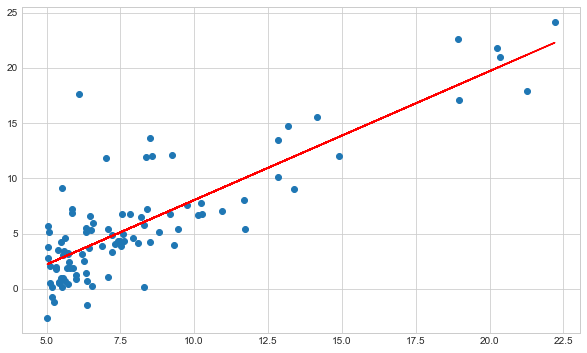

In [11]:
# Plotting the dataset and linear regression line

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X[:,[1]], y, cmap='winter')
ax.plot(X[:,1], np.dot(X, theta), '-', c="red")
plt.show()

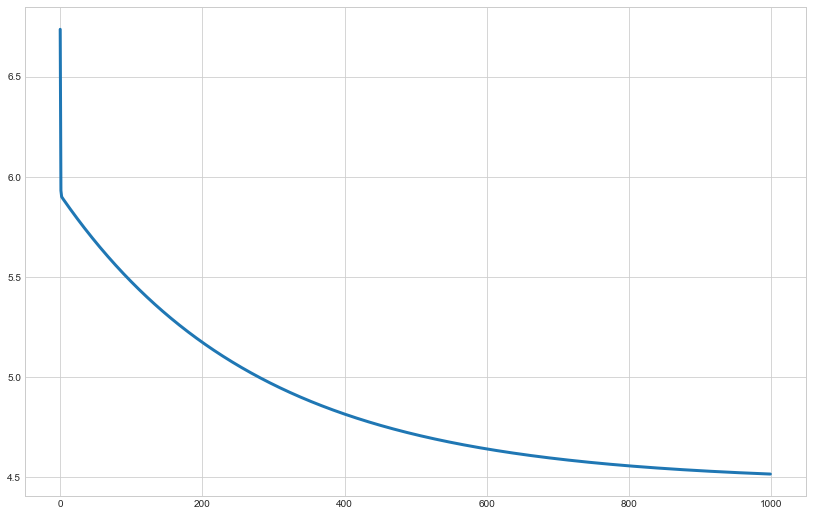

In [12]:
# Plotting cost function values over a 1000 iterations

fig, ax = plt.subplots(figsize=(14, 9))
ax.plot(range(1000), cost_values[:1000], linewidth=3)
plt.show()